# Actividad Evaluable 3: Mapas de calor y boxplots

## Integrantes: 
**Rosa Vanessa Palacios Beltrán | A01652612**

**Diego Reyna Reyes | A01657387**

**José Roberto Garduño Cerecedo | A01656294**

**Luis Angel Gonzalez Tapia| A01654625**

**Samuel Sandoval Delgado | A01656191**

**Daniel Rong Chen | A01656992**

En está actividad se realizará un análisis estadístico con los datos del archivo covid19_tweets.csv

## 1. Cargar los datos usando tu lector de csv o con pandas.

In [1]:
#Importar las librerias para el analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
import seaborn as sns

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [7]:
dataframe = pd.read_csv(r"covid19_tweets.csv")
dataframe["date"] = pd.to_datetime(dataframe["date"])
dataframe["user_created"] = pd.to_datetime(dataframe["user_created"])
dataframe.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


Veamos la información básica sobre el macro de datos de los Tweets de COVID19

In [3]:
dataframe.dtypes

user_name                   object
user_location               object
user_description            object
user_created        datetime64[ns]
user_followers               int64
user_friends                 int64
user_favourites              int64
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                    bool
dtype: object

In [40]:
dataframe.count()

user_name           74436
user_location       59218
user_description    70079
user_created        74436
user_followers      74436
user_friends        74436
user_favourites     74436
user_verified       74436
date                74436
text                74436
hashtags            53002
source              74424
is_retweet          74436
dtype: int64

In [39]:
dataframe['is_retweet']

0        False
1        False
2        False
3        False
4        False
         ...  
74431    False
74432    False
74433    False
74434    False
74435    False
Name: is_retweet, Length: 74436, dtype: bool

In [42]:
dataframe['user_verified']

0        False
1         True
2        False
3        False
4        False
         ...  
74431    False
74432    False
74433    False
74434    False
74435    False
Name: user_verified, Length: 74436, dtype: bool

In [4]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_followers,74436.0,105951.312913,822289.985493,0.0,166.0,960.0,5148.00,13892841.0
user_friends,74436.0,2154.721170,9365.587474,0.0,153.0,552.0,1780.25,497363.0
user_favourites,74436.0,15297.472030,46689.714291,0.0,220.0,1927.0,10148.00,2047197.0


# 2. Analisis de las variables


En esta sección analizaremos los datos y sacaremos algunas conclusiones basadas en el análisis.

Total de hashtags usados en los Tweets

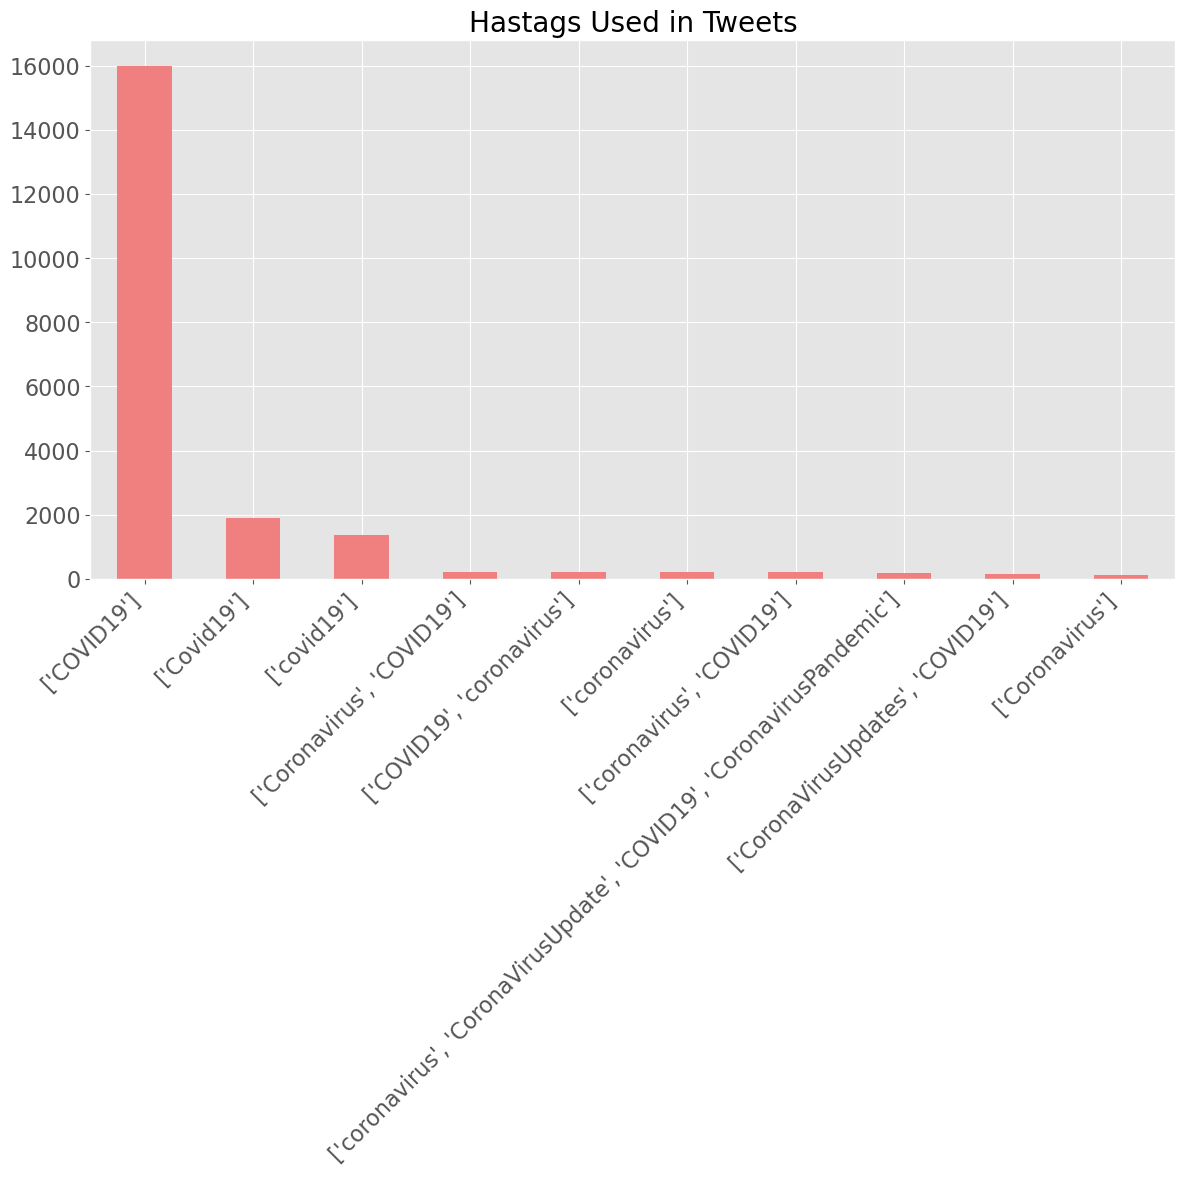

In [5]:
dataframe['hashtags'].value_counts().head(10).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('Hastags Used in Tweets', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

## Diagrama de cajas y bigotes

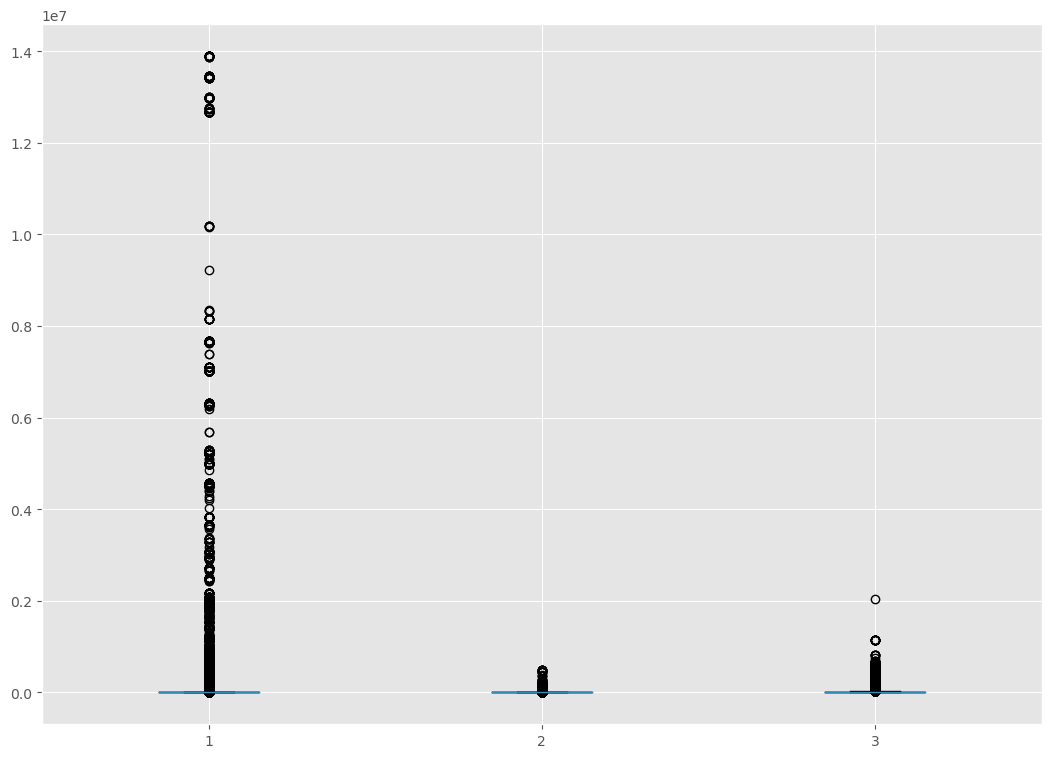

In [9]:
col1 = dataframe['user_followers']
col2 = dataframe['user_friends']
col3 = dataframe['user_favourites']
myData = [col1,col2,col3]
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(myData)
plt.show()

<Axes: >

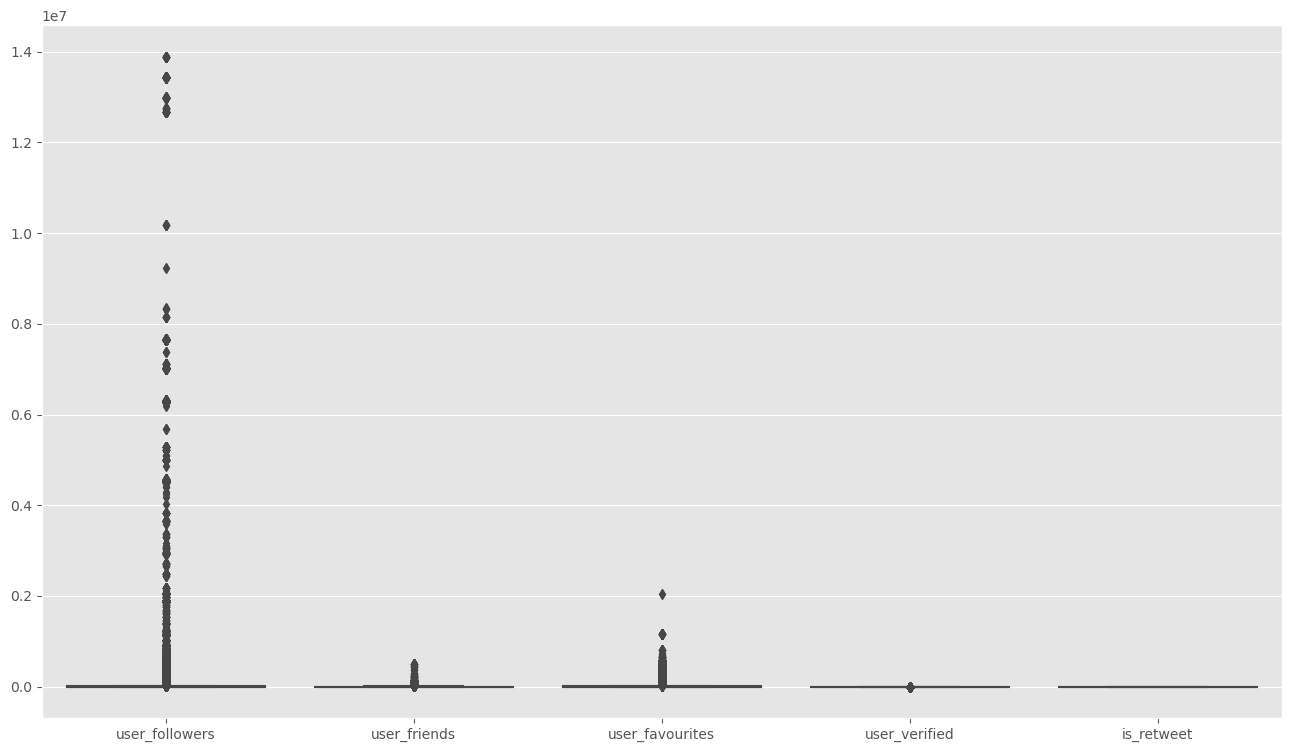

In [41]:
sb.boxplot(dataframe)

<Axes: >

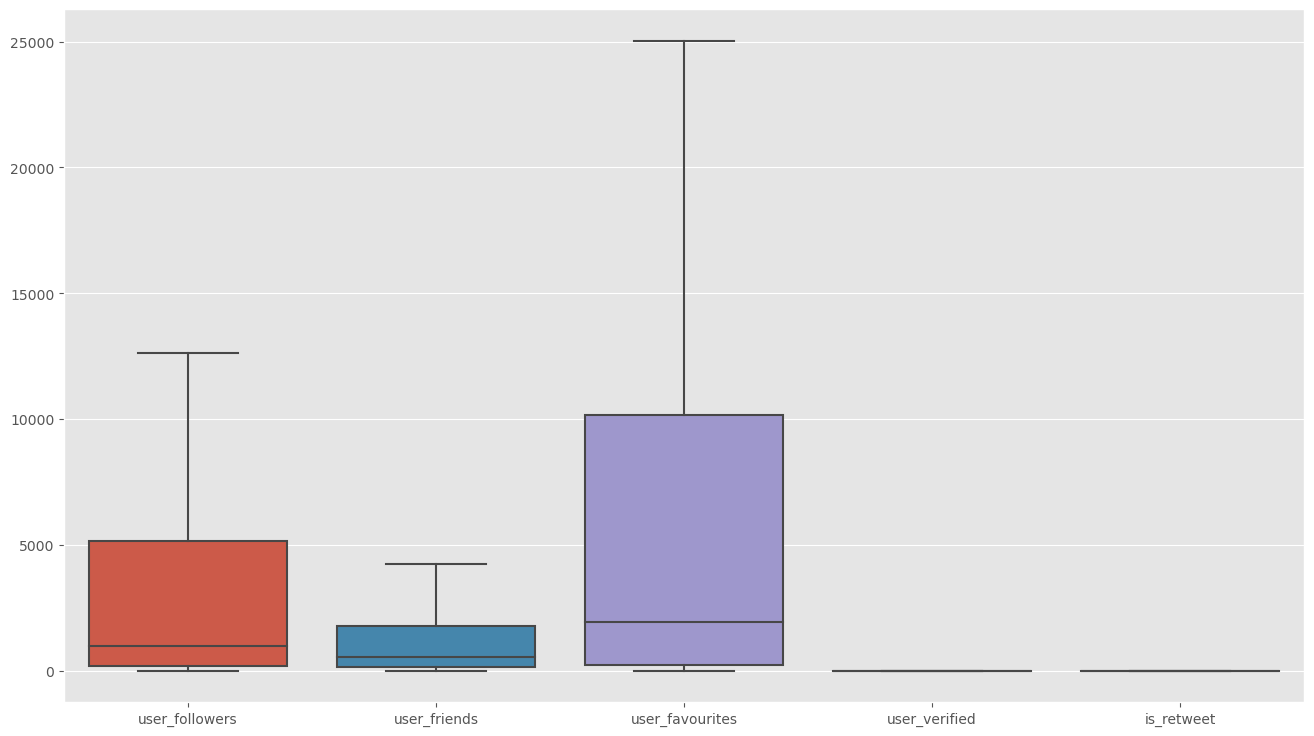

In [12]:
sb.boxplot(dataframe, showfliers = False)

In [38]:
dataframe.std()

C:\Users\ZERO3\AppData\Local\Temp\ipykernel_69440\3401367348.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.std()


user_created       1469 days 13:14:47.422444096
user_followers                    822289.985493
user_friends                        9365.587474
user_favourites                    46689.714291
user_verified                          0.331474
date                  3 days 13:31:04.147127121
is_retweet                                  0.0
dtype: object

C:\Users\ZERO3\anaconda3\envs\ArteDeLaAnalitica\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


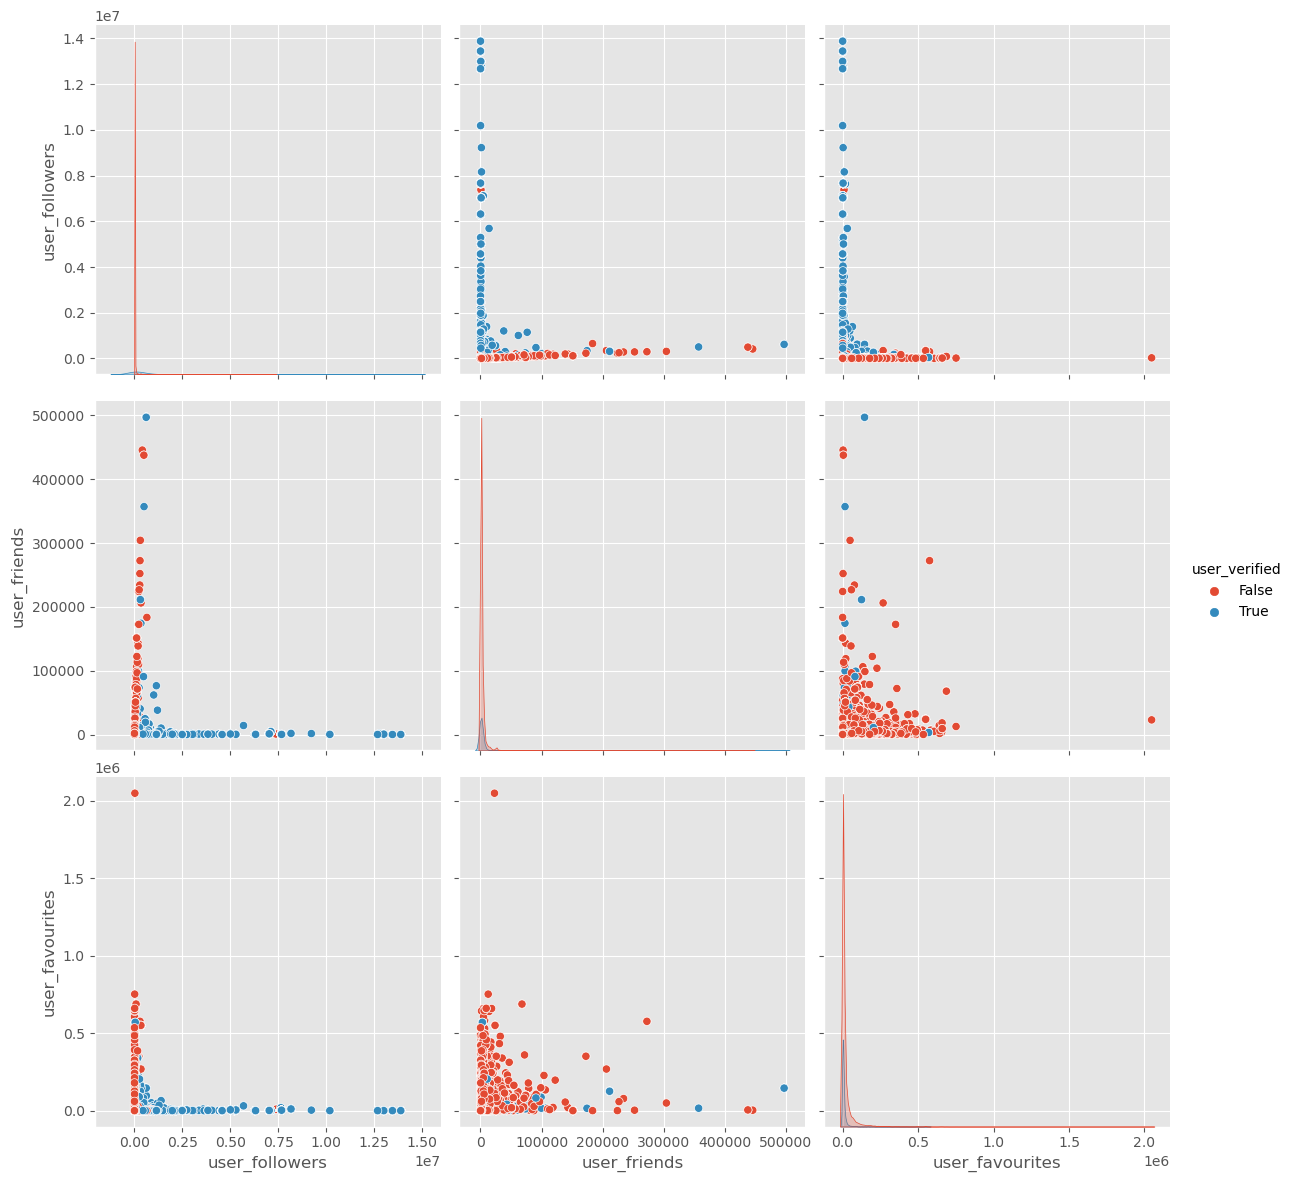

In [10]:
sb.pairplot(dataframe.dropna(), hue='user_verified',size=4,vars=["user_followers","user_friends","user_favourites"],kind='scatter')

C:\Users\ZERO3\anaconda3\envs\ArteDeLaAnalitica\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


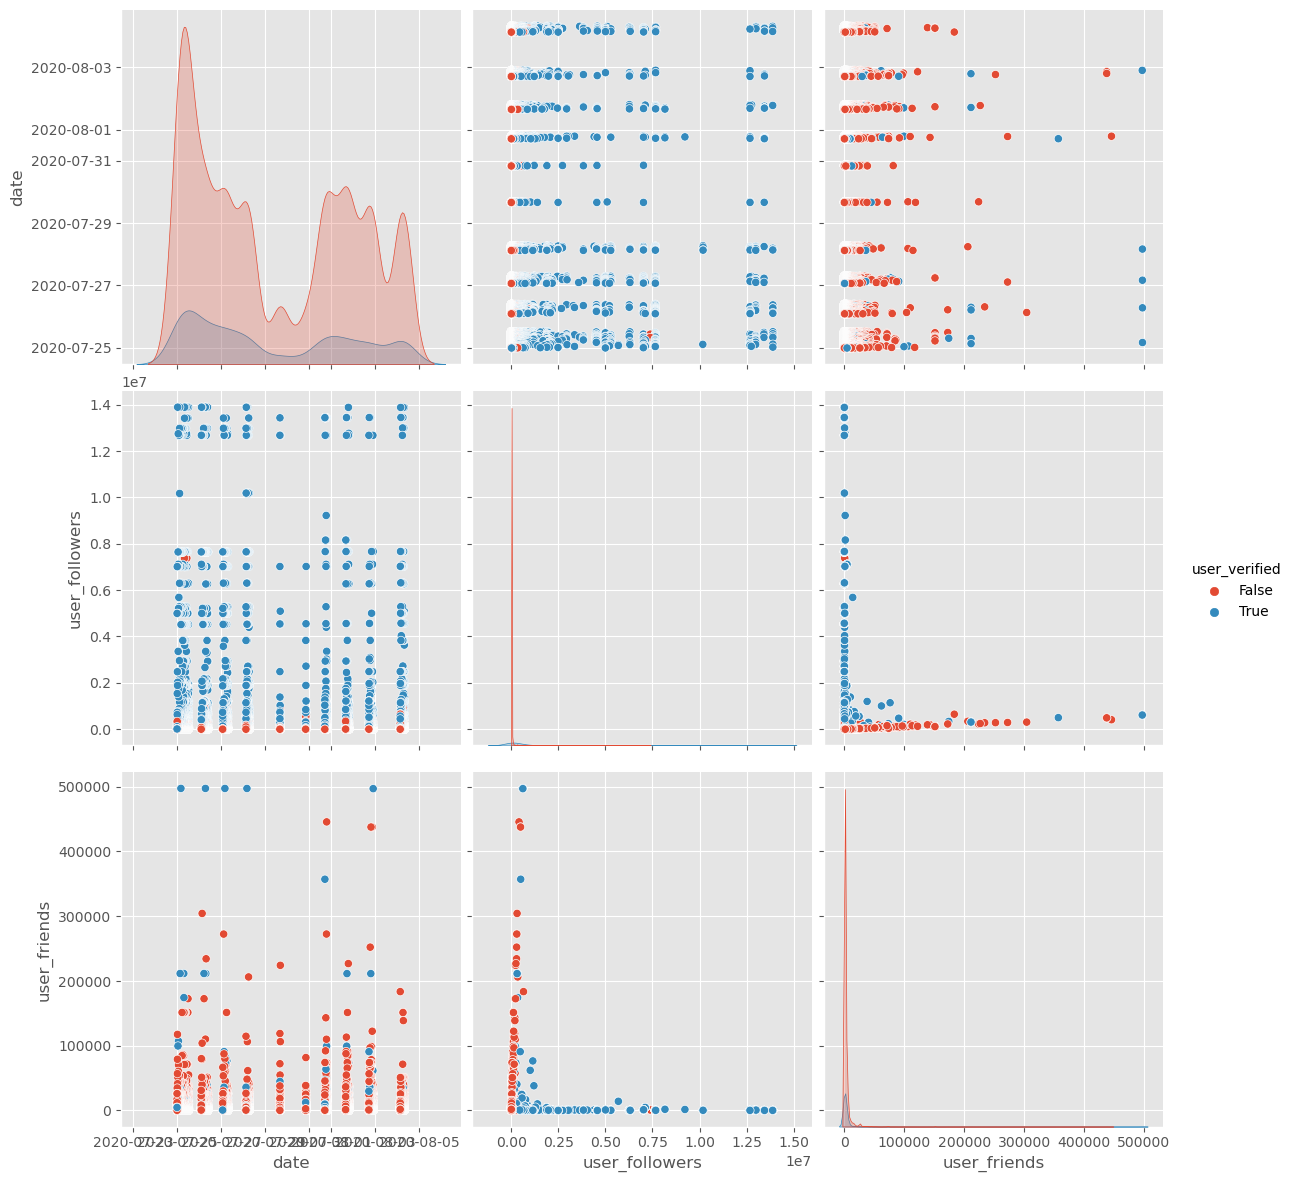

In [37]:
sb.pairplot(dataframe.dropna(),size=4,vars=["date","user_followers","user_friends"],kind='scatter',hue='user_verified')

## Histogramas

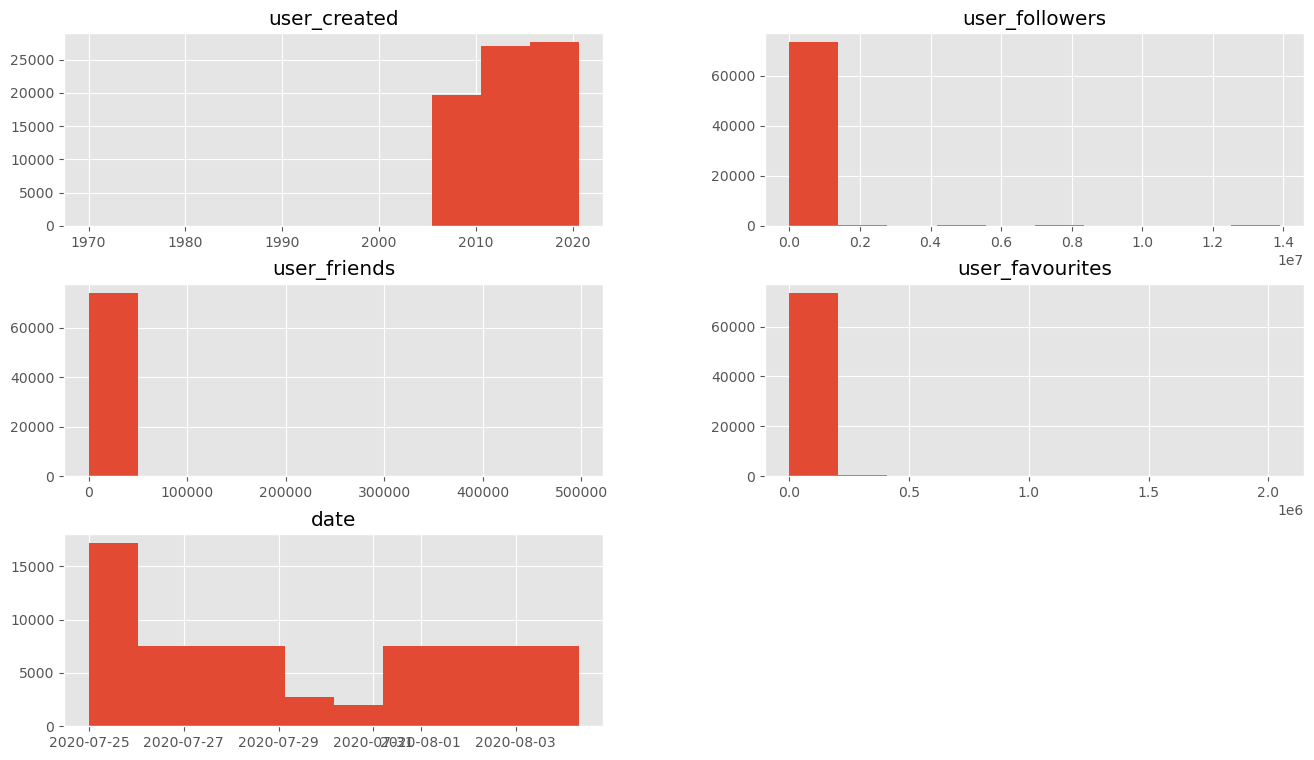

In [13]:
dataframe.hist()
plt.show()

## Mapas de calor

In [14]:
np.random.seed(2)
data = np.random

In [15]:
dataframe.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [17]:
dataframe.isna().sum()

user_name               0
user_location       15218
user_description     4357
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            21434
source                 12
is_retweet              0
dtype: int64

C:\Users\ZERO3\AppData\Local\Temp\ipykernel_69440\2807142575.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(), linewidths=0.1, vmax=1.0, square=True,


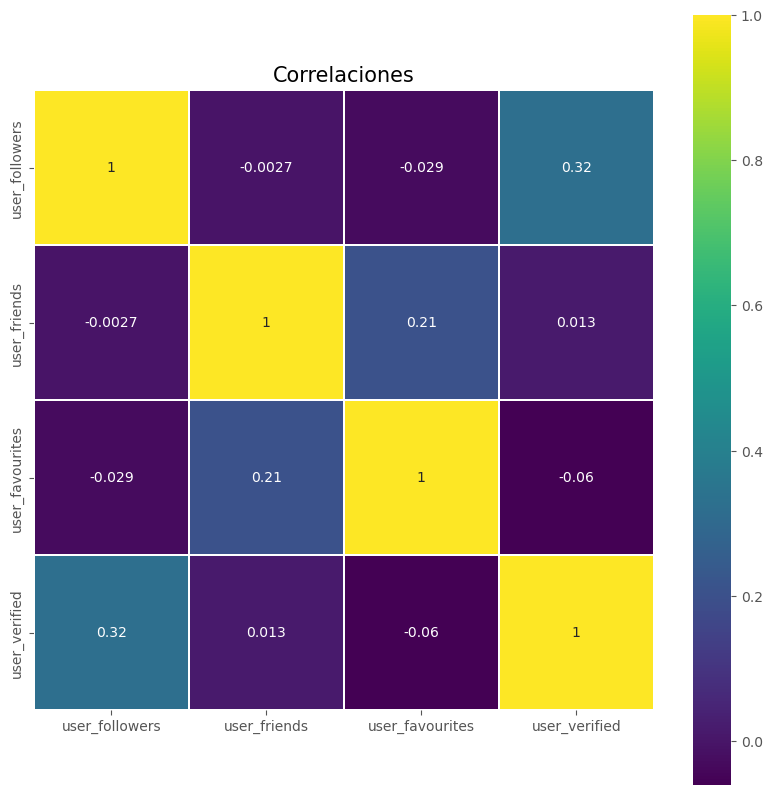

In [31]:
data = dataframe.drop(columns='is_retweet') #Se eliminio la columna de is_retweets porque no trae ninguna información para analizar
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title("Correlaciones", y=1, size=15)
sb.heatmap(data.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap, linecolor="white",annot=True);

array([[<Axes: title={'center': 'user_created'}>,
        <Axes: title={'center': 'user_followers'}>],
       [<Axes: title={'center': 'user_friends'}>,
        <Axes: title={'center': 'user_favourites'}>],
       [<Axes: title={'center': 'date'}>, <Axes: >]], dtype=object)

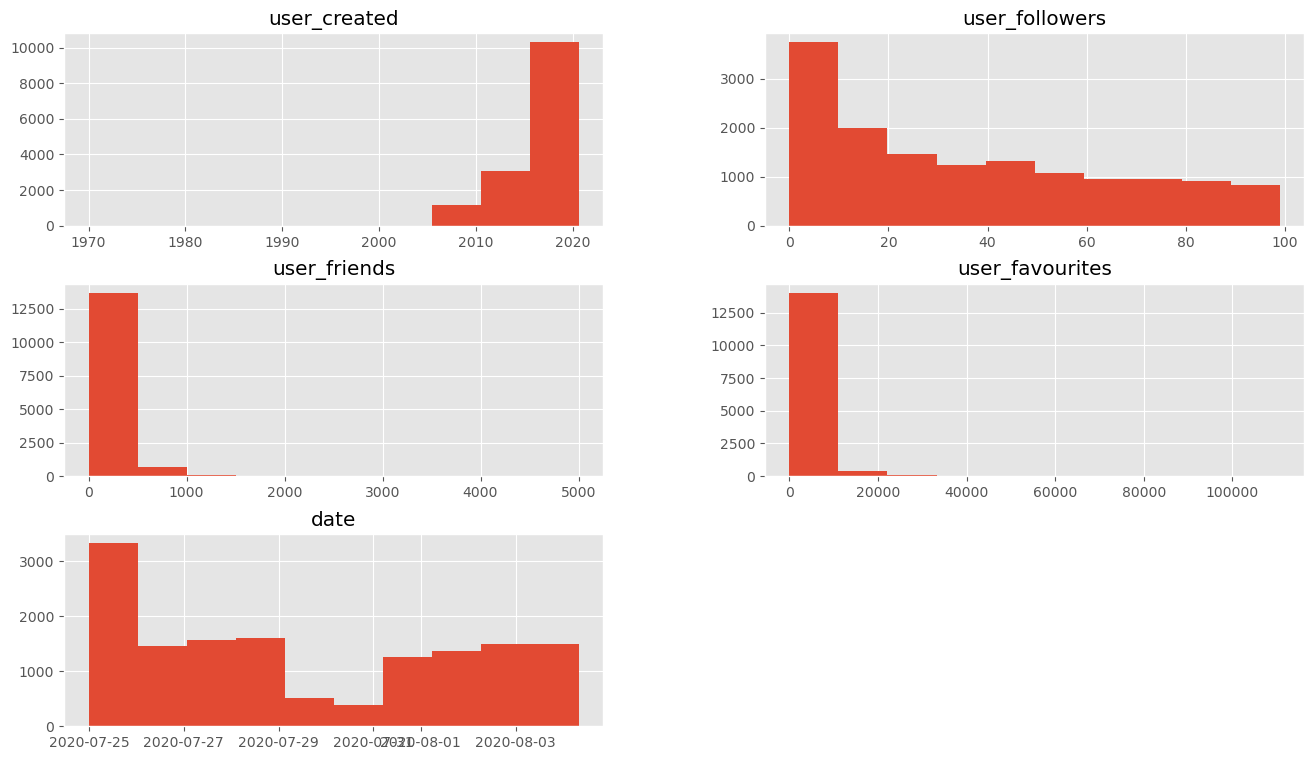

In [35]:
df2 = len(dataframe[dataframe['user_followers'] < 100])
df2
dataframe[dataframe['user_followers'] < 100].hist()

array([[<Axes: title={'center': 'user_created'}>,
        <Axes: title={'center': 'user_followers'}>],
       [<Axes: title={'center': 'user_friends'}>,
        <Axes: title={'center': 'user_favourites'}>],
       [<Axes: title={'center': 'date'}>, <Axes: >]], dtype=object)

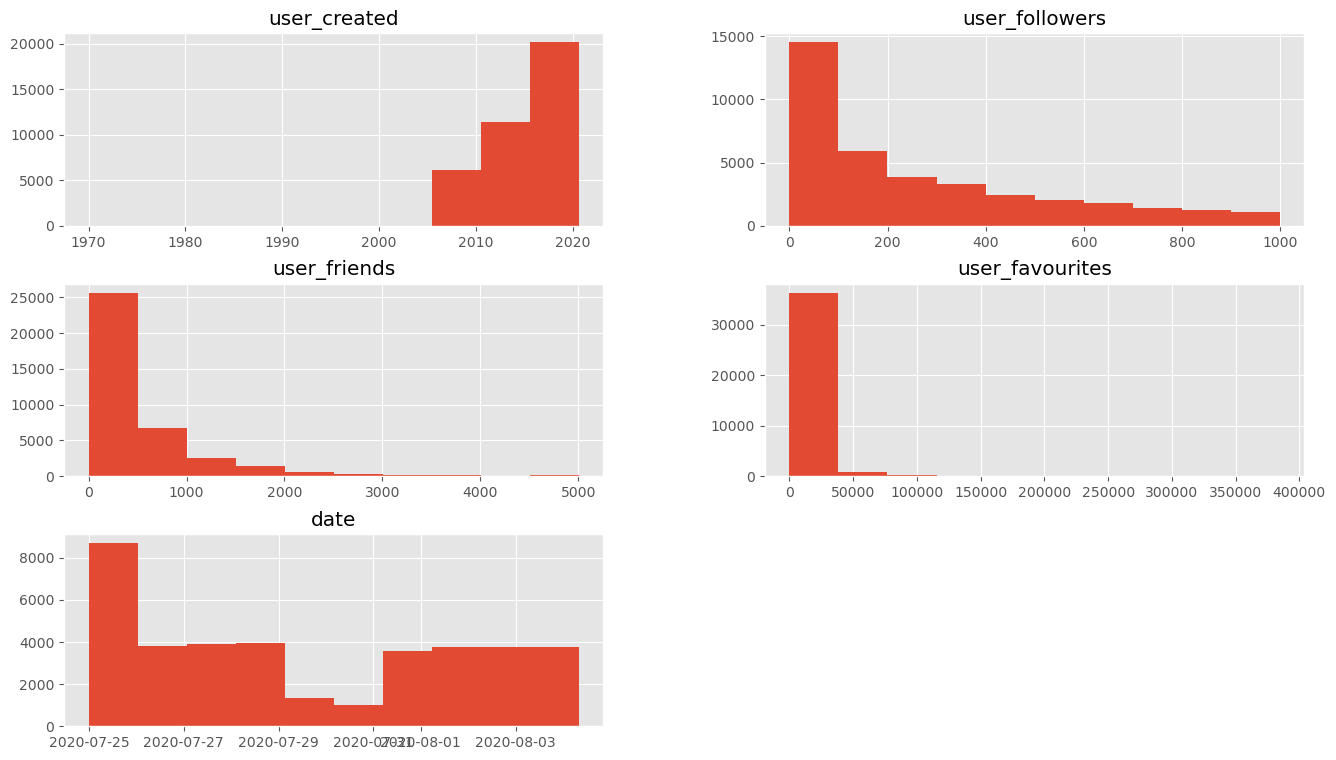

In [36]:
df3 = len(dataframe[dataframe['user_followers'] < 1000])
df3
dataframe[dataframe['user_followers'] < 1000].hist()

## Conclusión Daniel Rong 
¿Hay alguna variable que no aporta información?
Después de analizar los datos y las diversas variables de estos, existen diversas variables que el aporte de información es nula o casi nula, pues esta información no revela nada importante o relevante que deba ser interpretada. Un ejemplo de estas es la variable 'is_retweet', la cual indica si uno de los tweets fue retweeteado. Esta variable resulta irrelevante, ya que todos los valores son falsos y no se puede extraer información de esta. Por otra parte, otra variable que no aporte mucha información es 'user_friends', porque saber el número de amigos que tiene un usuario no es importante y no es un aspecto de relevancia que pueda proporcionar información a la hora de analizar los datos. De igual manera, la variable 'user_created' y 'user_location' también son variables que no aportan mucha información, puesto que la primera indica la fecha de creación del usuario y solo daría espacio para interpretar si fue una cuenta creada antes o durante la pandemia; en cuanto a la segunda variable, esta sí proporciona información relevante, ya que revela el lugar desde donde fue publicado el tweet, sin embargo los datos no son consistentes, pues hay entradas de lugar que no son lugares reales o no hay. Por último, la variable 'user_name' no aporta mucha información, debido a que todos los valores son únicos y están establecidos por los usuarios, a diferencia de 'user_description', que a pesar de tener valors únicos también, se puede obtener rasgos de personalidad a partir de estos. 

Si tuvieras que eliminar variables, ¿Cuáles quitarías y por qué?
De esta manera, las variables que pueden ser eliminadas o sustituidas serían las que casi no aportan información. En este caso serían las variables: 'is_retweet', 'user_location', 'user_created', 'user_friends','user_name' y algún otro. En el caso de  'user_friends' no afecta mucho su borrado, ya que se tiene a la variable 'user_followers' que aporta más información y da espacio para más interpretaciones. Por otro lado, 'user_location' y 'user_name' son variables irrelevantes, pues los datos de estos son únicos o son incosistentes. De igual forma, 'is_retweet' y 'user_created' no indican mucha información que derive a interpretaciones. 

¿Existen variables que tengan datos extraños?
Las variables con datos extraños serían 'user_location' y 'user_name', porque en la primera hay valores de lugares que no existen, no son lugares o simplemente no hay valores, mientras que en la otra variable hay valores que no son completamente entradas de texto.

Si comparas las variables, ¿todas están en rangos similares?
Comparando y contanto las variables se puede observar que hay no todas las variables contienen la misma cantidad de datos, por lo que los rangos de datos son distintos. Por ejemplo, hay variables como 'user_location' o 'hashtags' que tienen menor cantidad de datos, porque hay tweets que tienen estas variables vacías. En cuanto a las demás variables, la cantidad de datos es similar. pero con base en las gráficas, hay variables cuyos rangos de datos no son similares. Un ejemplo de estas sería que en la gráfica de cajas y bigotes se puede observar que los rangos son diferentes para variable.
 
¿Crees que esto afecte el análisis de los datos?
Que no todos lo datos estén en el mismo rango puede afectar el análisis de datos, ya que el hecho de que haya datos con variables vacías hace que a la hora de graficar haya espacios vacíos que afecten las interpretaciones. Sin embargo, pensando en los valores de las variables, que hayan distintos rangos puede aportar información, en este caso, información acerca de los seguidores y los likes. 

¿Puedes encontrar grupos que se parezcan? ¿Qué grupos son estos?
Con base en las gráficas, se puede observar que hay variables que de cierta manera están agrupadas como 'user_followers' y 'user_friends', ya que los valores que contienen estas 2 variables son bastentes similares e suelen tener la misma tendencia. Por otra parte, analizando las correlaciones, puede ser que las variables 'user_followers' y 'user_verified' tienen una relación o dependencia, pues se puede interpretar que los usuarios verificados tienden a tener más seguidores. 